In [2]:
import numpy as np
from Bio import SeqIO
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def mean_error_probs(filename, format_):
    # возвращает среднюю вероятность ошибки для позиции в риде
    n_pos = 0
    with open(filename) as f:
        f.readline()
        n_pos = len(f.readline()) - 1
    
    error_prob = [0 for _ in range(n_pos)]
    n_reads = 0
    for read in SeqIO.parse(filename, format_):
        n_reads += 1
        error_prob = [a + b for a, b in 
                      zip(error_prob, [10**(-x/10) for x in read.letter_annotations["phred_quality"]])]   
        
    error_prob = [x / n_reads for x in error_prob]
    return error_prob

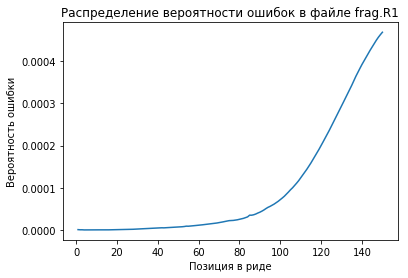

In [9]:
mean_errors_fragR1 = mean_error_probs("data/frag.R1.fastq", "fastq")
plt.plot(range(1, len(mean_errors_fragR1) + 1), mean_errors_fragR1)
plt.title('Распределение вероятности ошибок в файле frag.R1')
plt.xlabel('Позиция в риде')
plt.ylabel('Вероятность ошибки')
plt.savefig('fragR1_error_distribution.png')

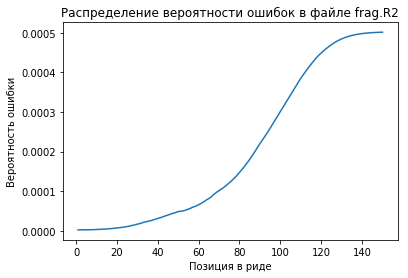

In [10]:
mean_errors_fragR2 = mean_error_probs("data/frag.R2.fastq", "fastq")
plt.plot(range(1, len(mean_errors_fragR2) + 1), mean_errors_fragR2)
plt.title('Распределение вероятности ошибок в файле frag.R2')
plt.xlabel('Позиция в риде')
plt.ylabel('Вероятность ошибки')
plt.savefig('fragR2_error_distribution.png')

# Распределение качества ридов в файле frag.R1, построенное программой fastqc
![title](data/fragR1_quality.png)

# Распределение качества ридов в файле frag.R2, построенное программой fastqc
![title](data/fragR2_quality.png)